In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
%matplotlib inline

In [2]:
mpls= pd.read_csv ('MplsStops.csv', index_col = 'Unnamed: 0', parse_dates = ['date'])
mpls.head()

,idNum,date,problem,MDC,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,policePrecinct,neighborhood
6823,17-000003,2017-01-01 00:00:42,suspicious,MDC,NaN,NO,NO,Unknown,Unknown,Unknown,44.966617,-93.246458,1,Cedar Riverside
6824,17-000007,2017-01-01 00:03:07,suspicious,MDC,NaN,NO,NO,Unknown,Unknown,Male,44.980450,-93.271340,1,Downtown West
6825,17-000073,2017-01-01 00:23:15,traffic,MDC,NaN,NO,NO,Unknown,White,Female,44.948350,-93.275380,5,Whittier
6826,17-000092,2017-01-01 00:33:48,suspicious,MDC,NaN,NO,NO,Unknown,East African,Male,44.948360,-93.281350,5,Whittier
6827,17-000098,2017-01-01 00:37:58,traffic,MDC,NaN,NO,NO,Unknown,White,Female,44.979078,-93.262076,1,Downtown West


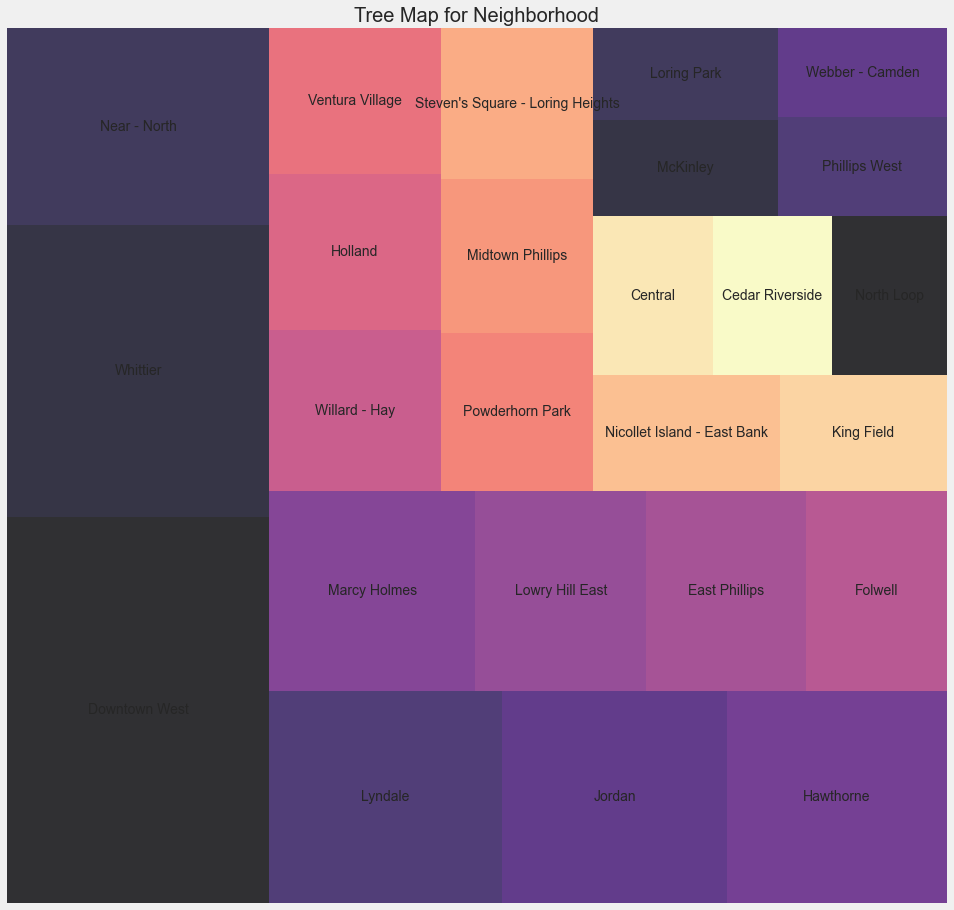

In [18]:
# plotting a tree map
# race_count = mpls.groupby(['race'])['idNum'].count().reset_index(name='counts').sort_values(by='counts',ascending=False)
# y = race_count['counts']
y = mpls['neighborhood'].value_counts().head(25)
    
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 20))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Neighborhood', fontsize = 20)

plt.axis('off')
plt.show()

In [24]:
problem_race = mpls.groupby(['problem','race'])['idNum'].count().reset_index(name='counts').sort_values(by='counts',ascending=False)
problem_race
# # Regions with count of crimes

# plt.style.use('seaborn')

# problem_race['problem'].value_counts().head(15).plot.pie(figsize = (15, 8), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
# plt.title('Stop Count BAsed On Race',fontsize = 20)
# plt.xticks(rotation = 90)
# plt.show()

,problem,race,counts
9,traffic,Black,9762
6,suspicious,Unknown,8463
15,traffic,White,8167
1,suspicious,Black,5458
7,suspicious,White,3536
10,traffic,East African,1545
11,traffic,Latino,1327
4,suspicious,Native American,1177
13,traffic,Other,811
14,traffic,Unknown,756


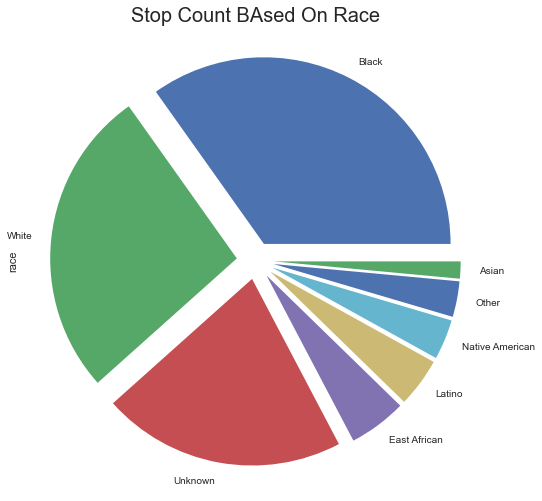

In [12]:
# Regions with count of crimes

plt.style.use('seaborn')

mpls['race'].value_counts().head(15).plot.pie(figsize = (15, 8), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))
plt.title('Stop Count BAsed On Race',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [2]:
mpls.dtypes

Unnamed: 0                 int64
idNum                     object
date              datetime64[ns]
problem                   object
MDC                       object
citationIssued            object
personSearch              object
vehicleSearch             object
preRace                   object
race                      object
gender                    object
lat                      float64
long                     float64
policePrecinct             int64
neighborhood              object
dtype: object

In [3]:
#number of male and female that were stopped  by the Minneapolis Police Department for the year 2017
#Here I want to know what type of arrays does the gender column in my dataset contains
mpls.gender.unique()
#output array(['Unknown', 'Male', 'Female', nan], dtype=object)

array(['Unknown', 'Male', 'Female', nan], dtype=object)

In [16]:
#To know how much of each type we have
mpls.gender.value_counts()
#output Male       27131
# Female     10015
# Unknown     6492
# Name: gender, dtype: int64

Male       27131
Female     10015
Unknown     6492
Name: gender, dtype: int64

In [17]:
mpls.problem.value_counts()

traffic       23199
suspicious    20439
Name: problem, dtype: int64

In [ ]:
t = mpls.PdDistrict.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

table

In [40]:
t = mpls.neighborhood.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
# table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)
#generate map
sf_map.choropleth(
    geo_data=gjson,
    data=table,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

sf_map

,Neighborhood,Count
0,Downtown West,4409
1,Whittier,3328
2,Near - North,2256
3,Lyndale,2154
4,Jordan,2075
...,...,...
82,Morris Park,74
83,Hale,61
84,Page,41
85,Camden Industrial,34


In [26]:
mpls.columns

Index(['idNum', 'date', 'problem', 'MDC', 'citationIssued', 'personSearch',
       'vehicleSearch', 'preRace', 'race', 'gender', 'lat', 'long',
       'policePrecinct', 'neighborhood'],
      dtype='object')

In [29]:
mpls.iloc[1000,:]

idNum                       17-011495
date              2017-01-10 19:45:43
problem                       traffic
MDC                               MDC
citationIssued                    NaN
personSearch                       NO
vehicleSearch                      NO
preRace                       Unknown
race                            Black
gender                           Male
lat                         44.975335
long                       -93.277636
policePrecinct                      1
neighborhood            Downtown West
Name: 7886, dtype: object

In [25]:
print("This is Behnoush")

This is Behnoush
